In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")

# Display the structure of the dataset
print(df.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [2]:
# Check for missing values
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [3]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
mean_height = df['Height'].mean()
df['Height'] = df['Height'].fillna(mean_height)
mean_weight = df['Weight'].mean()
df['Weight'] = df['Weight'].fillna(mean_weight)

print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [4]:
# Descriptive statistics
print(df.describe())

                  ID            Age        Height         Weight  \
count  271116.000000  271116.000000  271116.00000  271116.000000   
mean    68248.954396      25.556898     175.33897      70.702393   
std     39022.286345       6.280857       9.27810      12.574690   
min         1.000000      10.000000     127.00000      25.000000   
25%     34643.000000      22.000000     170.00000      63.000000   
50%     68205.000000      25.000000     175.33897      70.702393   
75%    102097.250000      28.000000     180.00000      75.000000   
max    135571.000000      97.000000     226.00000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


In [5]:
# Total medals won by country
medal_counts = df.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)
print(medal_counts)


NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Medal, dtype: int64


In [6]:
# Most successful athletes
top_athletes = df.groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
print(top_athletes)

Name
Michael Fred Phelps, II                 28
Larysa Semenivna Latynina (Diriy-)      18
Nikolay Yefimovich Andrianov            15
Takashi Ono                             13
Borys Anfiyanovych Shakhlin             13
Ole Einar Bjrndalen                     13
Edoardo Mangiarotti                     13
Natalie Anne Coughlin (-Hall)           12
Sawao Kato                              12
Dara Grace Torres (-Hoffman, -Minas)    12
Name: Medal, dtype: int64


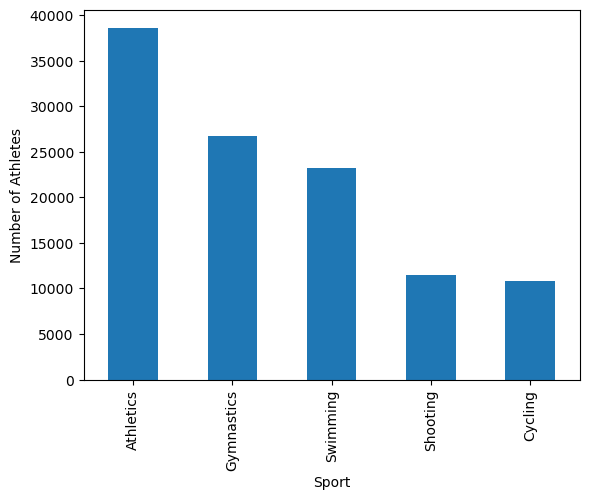

In [7]:
# Trends in popular sports over time
popular_sports = df['Sport'].value_counts().sort_values(ascending=False).head(5)
popular_sports.plot(kind='bar')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.show()

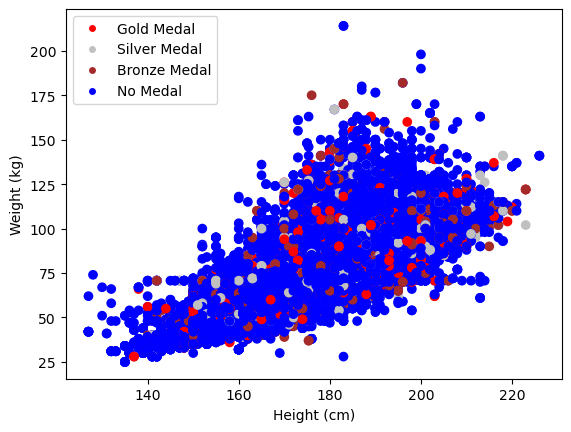

In [8]:
# Height and weight correlation with success
colors = {'Gold': 'red', 'Silver': 'silver', 'Bronze': 'brown', np.nan: 'blue'}
labels = {'Gold': 'Gold Medal', 'Silver': 'Silver Medal', 'Bronze': 'Bronze Medal', np.nan: 'No Medal'}

scatter_plot = plt.scatter(df['Height'], df['Weight'], c=df['Medal'].map(colors))

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=labels[key], markerfacecolor=colors[key]) for key in colors.keys()]
plt.legend(handles=legend_elements)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

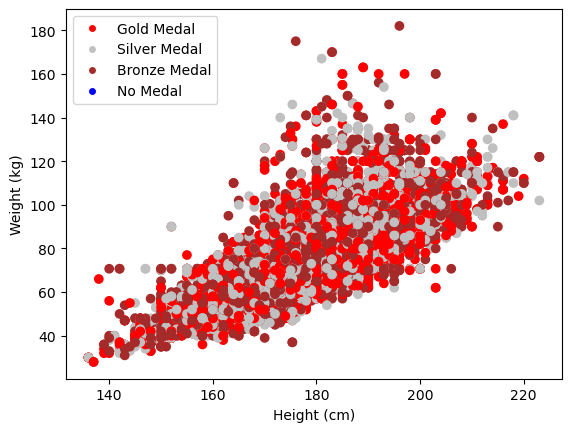

In [9]:

# Filter the dataframe to exclude rows without a medal
df_filtered = df.dropna(subset=['Medal'])

# Height and weight correlation with success
plt.scatter(df_filtered['Height'], df_filtered['Weight'], c=df_filtered['Medal'].map({'Gold': 'red', 'Silver': 'silver', 'Bronze': 'brown'}))
plt.legend(handles=legend_elements)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()
